In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read the dataset to the python environment.

In [2]:
data=pd.read_excel('iris.xls')

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 2. Do necessary pre-processing steps.¶

In [4]:
data.shape

(150, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

Columns Sepal Length Sepal Width and Petal Length has 7,6,6 null values respectively. 

In [7]:
#Checking data types

In [8]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [9]:
#Checking the skewness of data

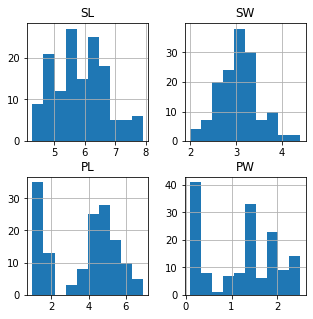

In [10]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(5,5))
plt.show()

In [11]:
#Replacing the missing values with median

In [12]:
data['SL']=data['SL'].fillna(data['SL'].median())
data['SW']=data['SW'].fillna(data['SW'].median())
data['PL']=data['PL'].fillna(data['PL'].median())

In [13]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [14]:
#Now the missing values are replaced with their respective median values

In [15]:
#Checking for outliers, Plotting box plot of each column

In [16]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

Text(0.5, 1.0, 'Sepal Length')

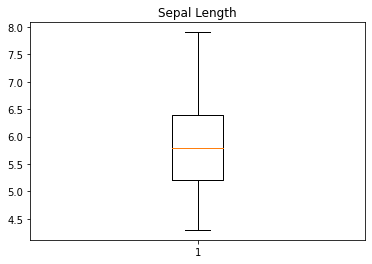

In [17]:
plt.boxplot(data['SL'])
plt.title('Sepal Length')

In [18]:
# No outliers in the column Sepal Length

Text(0.5, 1.0, 'Sepal Width')

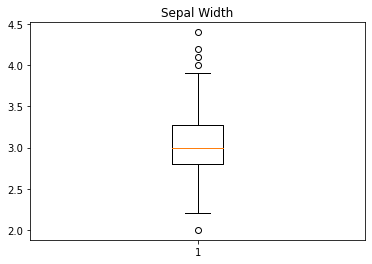

In [19]:
plt.boxplot(data['SW'])
plt.title('Sepal Width')

In [20]:
#Outliers are present in sepal width. Managing outliers in sepal width 

In [21]:
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')
print(Q1,'\n',Q2,'\n',Q3)

2.8 
 3.0 
 3.25


In [22]:
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
Up_limit=Q3+1.5*IQR
print(IQR,'\n',low_limit,'\n',Up_limit)

0.4500000000000002 
 2.1249999999999996 
 3.9250000000000003


In [23]:
outlier=[]
for x in data['SW']:
    if((x>Up_limit) or (x<low_limit)):
        outlier.append(x)

In [24]:
print(outlier)

[4.0, 4.4, 4.1, 4.2, 2.0]


In [25]:
indx1=data['SW'][(data['SW']>Up_limit)|(data['SW']<low_limit)].index
data.loc[indx1].index

Int64Index([14, 15, 32, 33, 60], dtype='int64')

In [26]:
#Dropping the outliers

In [27]:
data.drop([14, 15, 32, 33, 60],inplace=True)

Text(0.5, 1.0, 'box plot of Sepal Width')

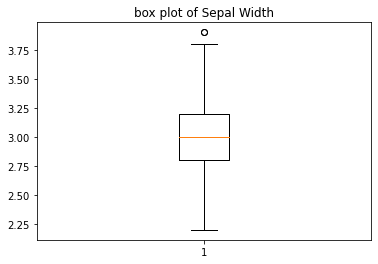

In [28]:
plt.boxplot(data['SW'])
plt.title('box plot of Sepal Width')

Text(0.5, 1.0, 'Petal Length')

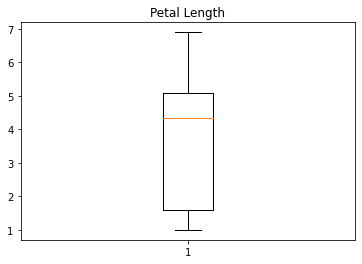

In [29]:
plt.boxplot(data['PL'])
plt.title('Petal Length')

In [30]:
#No outliers in PL column

Text(0.5, 1.0, 'Petal Width')

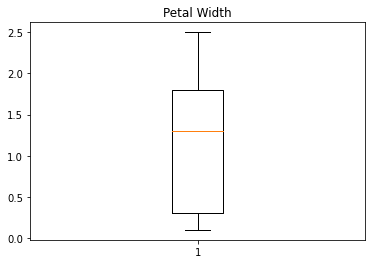

In [31]:
plt.boxplot(data['PW'])
plt.title('Petal Width')

In [32]:
#No outliers in petal width

In [33]:
data.shape

(145, 5)

In [34]:
data.Classification.nunique()

3

In [35]:
#Splitting data 

In [36]:
X=data.drop(['Classification'],axis=1)
Y=data['Classification']

In [37]:
#Normalization

In [38]:
from sklearn import preprocessing
X=preprocessing.normalize(X)
X=pd.DataFrame(X)
X.describe()

,0,1,2,3
count,145.000000,145.000000,145.000000,145.000000
mean,0.750558,0.397703,0.465043,0.144106
std,0.048136,0.097243,0.154637,0.077887
min,0.631396,0.238392,0.168646,0.016695
25%,0.713666,0.325894,0.262330,0.051382
50%,0.747142,0.354212,0.539660,0.164742
75%,0.788928,0.507020,0.582878,0.197997
max,0.860939,0.607125,0.636981,0.280419


In [39]:
#Splitting to test train set

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.2)

# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

# 1. Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(X_train,Y_train)
Y_predictions = logit_model.predict(X_test)

In [42]:
#to check how the model is worked checking accuracy precision f1 score confusion matrix

In [43]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [44]:
print('Confusion matrix\n',confusion_matrix(Y_test,Y_predictions))
print('Accuracy is: ',accuracy_score(Y_test,Y_predictions))
print('Precision is: ',precision_score(Y_test,Y_predictions,average='macro'))
print('Recall is: ' ,recall_score(Y_test,Y_predictions,average='macro'))
print('f1 is: ' ,f1_score(Y_test,Y_predictions,average='macro'))

Confusion matrix
 [[ 9  0  0]
 [ 0  4  5]
 [ 0  0 11]]
Accuracy is:  0.8275862068965517
Precision is:  0.8958333333333334
Recall is:  0.8148148148148149
f1 is:  0.8100664767331435


# kNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier
acc_value=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,Y_train)
    Y_predictions=classifier.predict(X_test)
    acc=accuracy_score(Y_test,Y_predictions)
    acc_value.append(acc)

In [46]:
acc_value

[0.9310344827586207,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.9310344827586207,
 0.896551724137931]

In [47]:
#plotting acc values vs k values

Text(0, 0.5, 'acc_value')

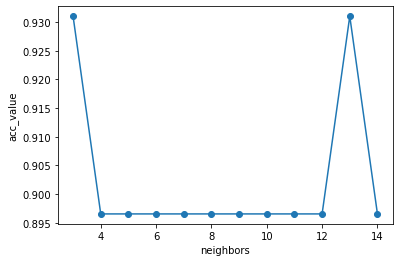

In [48]:
plt.plot(neighbors,acc_value,'o-')
plt.xlabel('neighbors')
plt.ylabel('acc_value')

In [49]:
#13 got highest accuracy value. a model  can be made with k as 13

In [50]:
classifier=KNeighborsClassifier(n_neighbors=13,metric='minkowski')
classifier.fit(X_train,Y_train)
Y_predictions=classifier.predict(X_test)

In [51]:
#Checking the accuracy precision f1 score and confusion matrix values

In [52]:
print('Confusion matrix\n',confusion_matrix(Y_test,Y_predictions))
print('Accuracy is: ',accuracy_score(Y_test,Y_predictions))
print('Precision is: ',precision_score(Y_test,Y_predictions,average='macro'))
print('Recall is: ' ,recall_score(Y_test,Y_predictions,average='macro'))
print('f1 is: ' ,f1_score(Y_test,Y_predictions,average='macro'))

Confusion matrix
 [[ 9  0  0]
 [ 0  8  1]
 [ 0  1 10]]
Accuracy is:  0.9310344827586207
Precision is:  0.9326599326599326
Recall is:  0.9326599326599326
f1 is:  0.9326599326599326


# SVM

In [53]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='rbf')
svm_linear.fit(X_train,Y_train)
Y_predictions=svm_linear.predict(X_test)

In [54]:
print('Confusion matrix\n',confusion_matrix(Y_test,Y_predictions))
print('Accuracy is: ',accuracy_score(Y_test,Y_predictions))
print('Precision is: ',precision_score(Y_test,Y_predictions,average='macro'))
print('Recall is: ' ,recall_score(Y_test,Y_predictions,average='macro'))
print('f1 is: ' ,f1_score(Y_test,Y_predictions,average='macro'))

Confusion matrix
 [[ 9  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Accuracy is:  0.9655172413793104
Precision is:  0.9722222222222222
Recall is:  0.9629629629629629
f1 is:  0.9658994032395567


# Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier
dect_model=DecisionTreeClassifier()
dect_model.fit(X_train,Y_train)
Y_predictions=dect_model.predict(X_test)

In [56]:
print('Confusion matrix\n',confusion_matrix(Y_test,Y_predictions))
print('Accuracy is: ',accuracy_score(Y_test,Y_predictions))
print('Precision is: ',precision_score(Y_test,Y_predictions,average='macro'))
print('Recall is: ' ,recall_score(Y_test,Y_predictions,average='macro'))
print('f1 is: ' ,f1_score(Y_test,Y_predictions,average='macro'))

Confusion matrix
 [[ 9  0  0]
 [ 0  7  2]
 [ 0  0 11]]
Accuracy is:  0.9310344827586207
Precision is:  0.9487179487179488
Recall is:  0.9259259259259259
f1 is:  0.9305555555555555


# Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
Y_predictions=rf.predict(X_test)

In [58]:
print('Confusion matrix\n',confusion_matrix(Y_test,Y_predictions))
print('Accuracy is: ',accuracy_score(Y_test,Y_predictions))
print('Precision is: ',precision_score(Y_test,Y_predictions,average='macro'))
print('Recall is: ' ,recall_score(Y_test,Y_predictions,average='macro'))
print('f1 is: ' ,f1_score(Y_test,Y_predictions,average='macro'))

Confusion matrix
 [[ 9  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Accuracy is:  0.9655172413793104
Precision is:  0.9722222222222222
Recall is:  0.9629629629629629
f1 is:  0.9658994032395567


Random Forest and Support Vector machine has highest accuracy compared to other models. Hence SVM and Random Forest classification models give the best result to predict iris
species.